In [1]:
pip install pandas matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
# Estilo visual Grafico
plt.style.use('ggplot')

In [14]:
# Cargar el archivo 
df = pd.read_csv(r'C:\Users\Camilo\Desktop\netflix_titles.csv')

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# Revisar valores faltantes
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
# Llenar valores nulos en 'country'
df['country'] = df['country'].fillna('Unknown')

# Eliminar filas sin 'date_added'
df.dropna(subset=['date_added'], inplace=True)

In [22]:
# Convertir fecha a formato datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)

In [24]:
# Crear nuevas columnas útiles
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


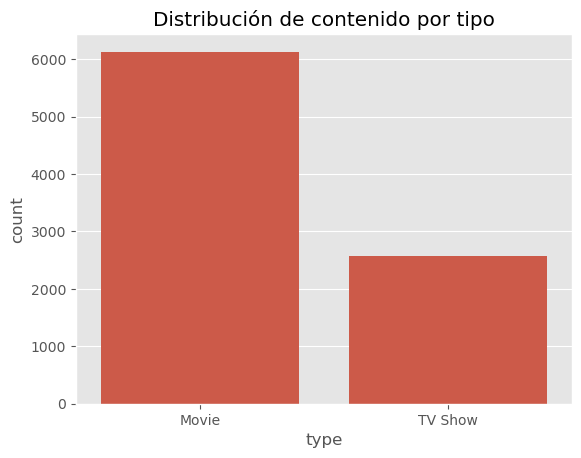

In [38]:
#Contenido tipo (Película o Serie):
sns.countplot(data=df, x='type')
plt.title('Distribución de contenido por tipo')
plt.savefig("visualizations/country_distribution.png")
plt.show()

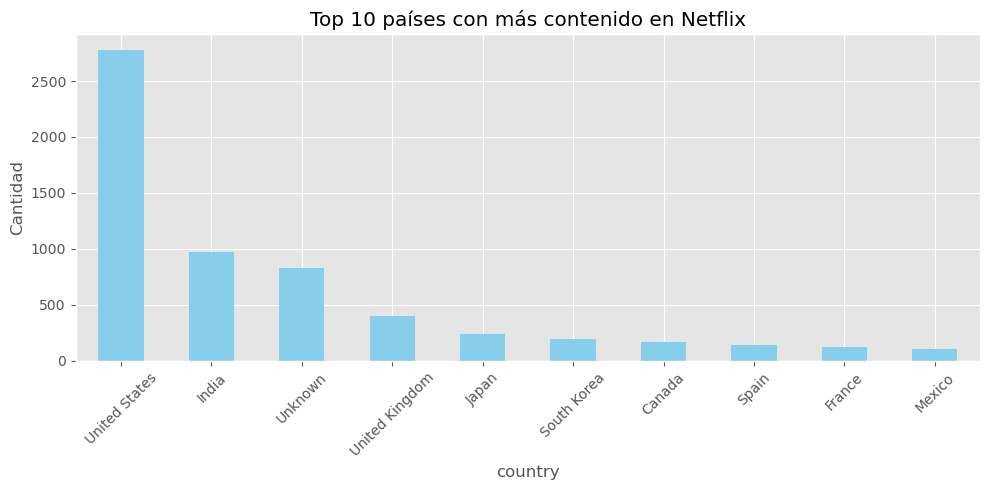

In [40]:
#Países con más contenido
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 países con más contenido en Netflix')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualizations/country_distribution.png")
plt.show()

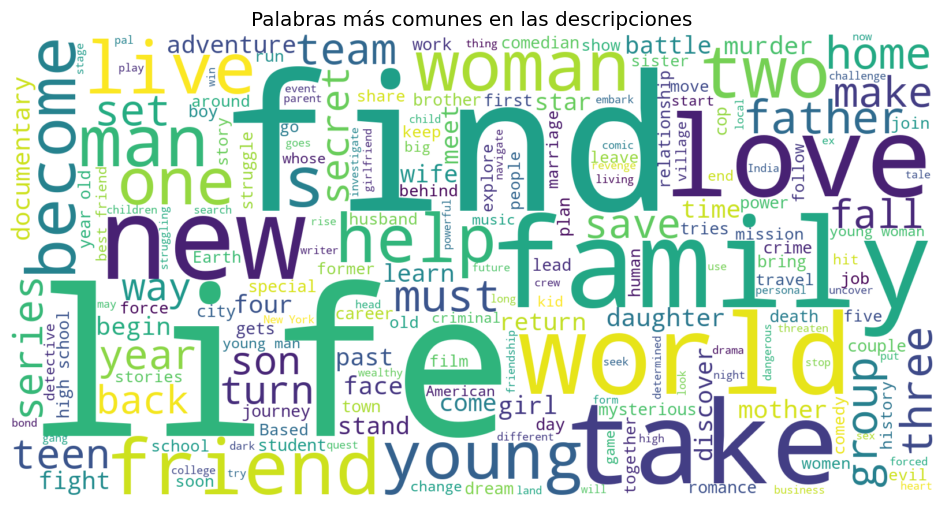

In [42]:
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más comunes en las descripciones')
plt.savefig("visualizations/wordcloud.png")
plt.show()

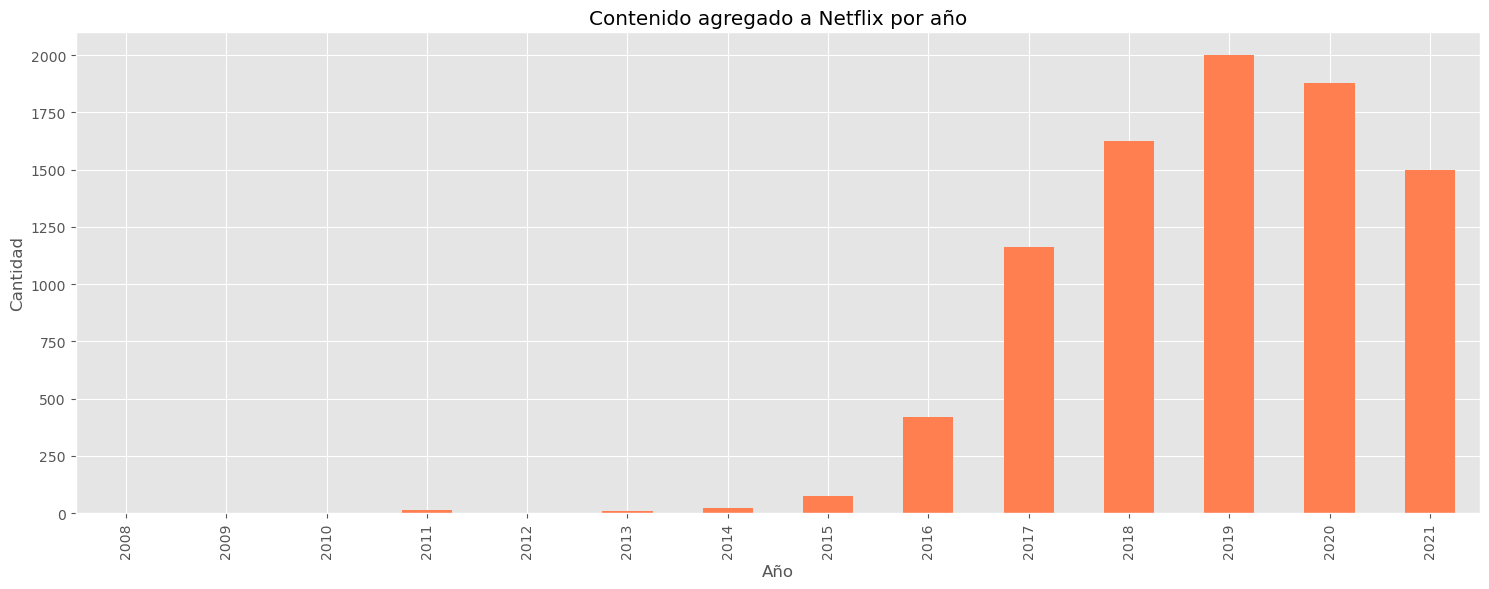

In [44]:
#Contenido agregado por año
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(15,6), color='coral')
plt.title('Contenido agregado a Netflix por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.savefig("visualizations/release_years.png")
plt.show()